<a href="https://colab.research.google.com/github/Angel-GS07/Prediccion-de-CHD-usando-ML--Python/blob/main/ML_Heart_Disease_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar las librerias necearias para empezar:

In [59]:
import pandas as pd #manipulación y el análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales, es como el Excel de Python.
import pylab as pl
import numpy as np # este sí soporte para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel
import scipy.optimize as opt #este sí  para optimización, álgebra lineal, integración, interpolación, funciones especiales, FFT, procesamiento de señales y de imagen, resolución de ODEs, etc
import statsmodels.api as sm #este sí biblioteca de análisis y modelado de datos estadísticos
from sklearn import preprocessing #este sí Incluye varios algoritmos de clasificación, regresión y análisis de grupos entre los cuales están máquinas de vectores de soporte, bosques aleatorios, Gradient boosting, K-means y DBSCAN
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt #es una biblioteca para la generación de gráficos en dos dimensiones, a partir de datos contenidos en listas o arrays
import matplotlib.mlab as mlab
import seaborn as sns # biblioteca para crear gráficos estadísticos

# Cargar los datos a nuestro notebook.

El conjunto de datos proviene de un estudio cardiovascular en curso sobre residentes de la ciudad de Framingham, Massachusetts. El objetivo de la clasificación es predecir si el paciente tiene riesgo a 10 años de sufrir enfermedad coronaria (CHD) en el futuro. El conjunto de datos proporciona la información de los pacientes. Incluye más de 4.000 registros y 15 atributos.

In [60]:
disease_df = pd.read_csv("/content/framingham.csv")

disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)
disease_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Remover los vacios

In [61]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0         1   39        4.0              0         0.0     0.0   
1         0   46        2.0              0         0.0     0.0   
2         1   48        1.0              1        20.0     0.0   
3         0   61        3.0              1        30.0     0.0   
4         0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  TenYearCHD  
0       80.0     77.0           0  
1       95.0     76.0           0  
2       75.0     70.0           0  
3 

Hasta aquí, podemos explorar los datos e investigar cuales son los atributos que se presentan, por ejemplo edad, si fuma y cuántos cigarrillos fua al día, etc.


# ML Tools

Dividir el conjunto de datos en conjuntos de prueba y entrenamiento

Definimos las variables con las que vamos a trabajar

# Prueba 1

Definir las variables con las que vamos a entrenar el modelo

In [62]:
#Definir las variables independiente y dependiente
#Dentro de la variable independiente definimos los atributos que queremos usar, por ejemplo:'age', 'Sex_male', 'cigsPerDay', totChol', 'sysBP', 'glucose'

X = np.asarray(disease_df[['age', 'Sex_male', 'heartRate',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2560, 6) (2560,)
Test set: (1098, 6) (1098,)


# Análisis de datos exploratorios del conjunto de datos de enfermedades cardíacas

In [63]:
df_def = pd.read_csv('/content/framingham.csv')
df_def

#lo siguiente nos sirve para definir las variables dependiente e independiente


df_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [64]:
col = ['male', 'education','age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
df_def = df_def[col]
df_def

,male,education,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,4.0,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,2.0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1.0,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,3.0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,3.0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,2.0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,1.0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,2.0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,3.0,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


Registro de enfermedad coronaria de diez años de todos los pacientes disponibles en el conjunto de datos:


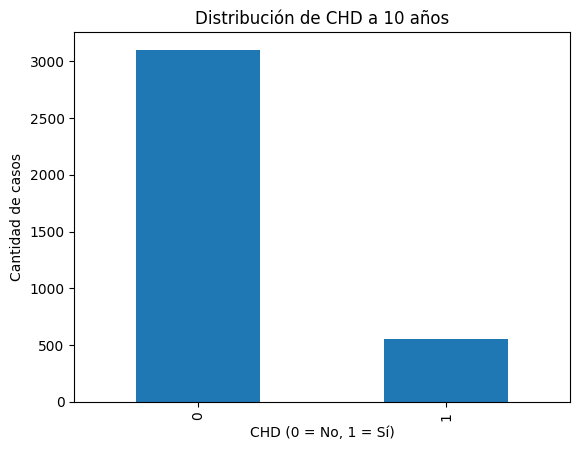

In [65]:
disease_df['TenYearCHD'].value_counts().plot(kind='bar')
plt.title('Distribución de CHD a 10 años')
plt.xlabel('CHD (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de casos')
plt.show()

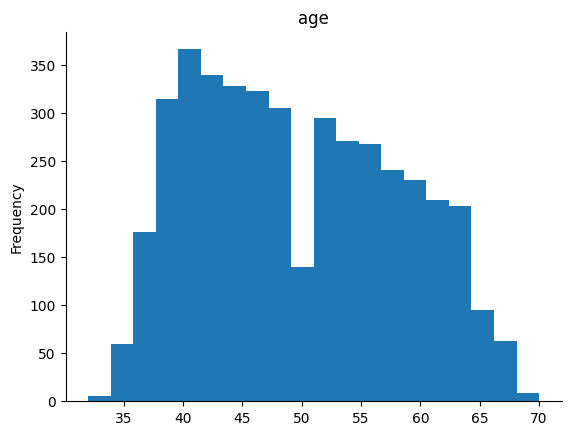

In [66]:
from matplotlib import pyplot as plt
df_def['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

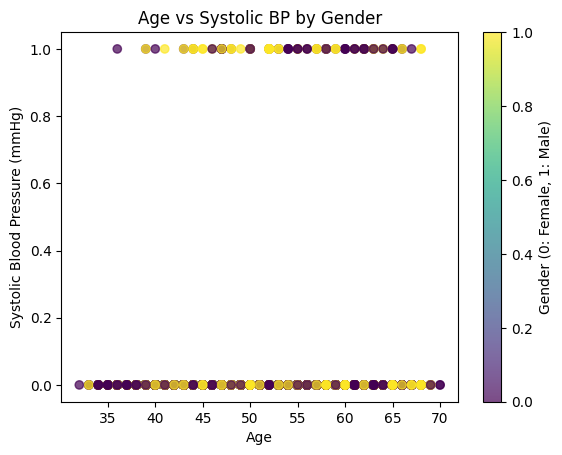

In [67]:
import matplotlib.pyplot as plt

scatter = plt.scatter(df_def['age'], df_def['diabetes'], c=df_def['male'], cmap='viridis', alpha=0.7)
plt.title('Age vs Systolic BP by Gender')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (mmHg)')
_ = plt.colorbar(scatter, label='Gender (0: Female, 1: Male)')

Explorar relaciones entre variables

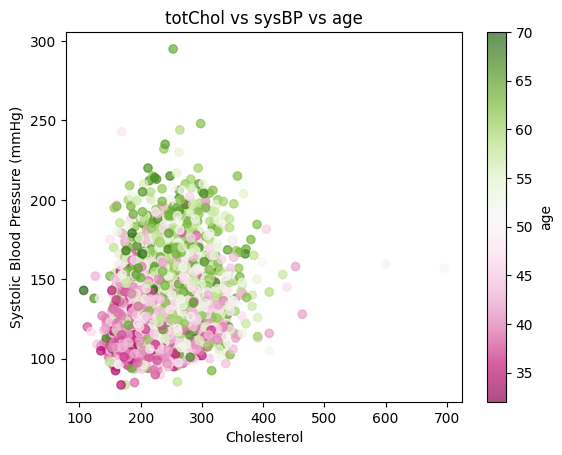

In [68]:
import matplotlib.pyplot as plt

scatter = plt.scatter(df_def['totChol'], df_def['sysBP'], c=df_def['age'], cmap='PiYG', alpha=0.7)
plt.title('totChol vs sysBP vs age')
plt.xlabel('Cholesterol')
plt.ylabel('Systolic Blood Pressure (mmHg)')
_ = plt.colorbar(scatter, label='age')

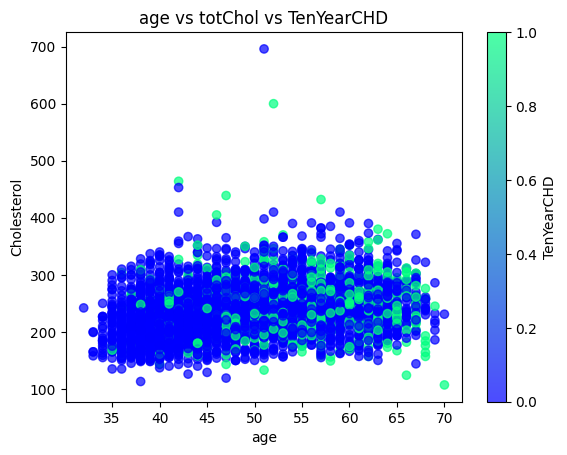

In [69]:
import matplotlib.pyplot as plt

scatter = plt.scatter(df_def['age'], df_def['totChol'], c=df_def['TenYearCHD'], cmap='winter', alpha=0.7)
plt.title('age vs totChol vs TenYearCHD')
plt.xlabel('age')
plt.ylabel('Cholesterol')
_ = plt.colorbar(scatter, label='TenYearCHD')

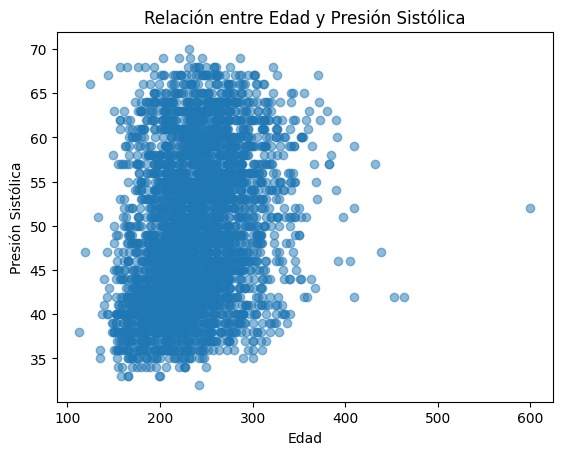

In [70]:
plt.scatter(disease_df['totChol'], disease_df['age'], alpha=0.5)
plt.title('Relación entre Edad y Presión Sistólica')
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.show()

#Logistic Regresion

Llamar y entrenar al modelo

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


Evaluar el modelo con la métrica Acurracy

In [72]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8451730418943534


Accuracy (Exactitud) <p>

Definición: Es el porcentaje de predicciones correctas sobre el total de predicciones. Mide qué tan bien clasifica el modelo en general, tanto los positivos como los negativos.

Accuracy= (tp + tn) / (tp + tn + fp + fn)

# Matriz de Confusión

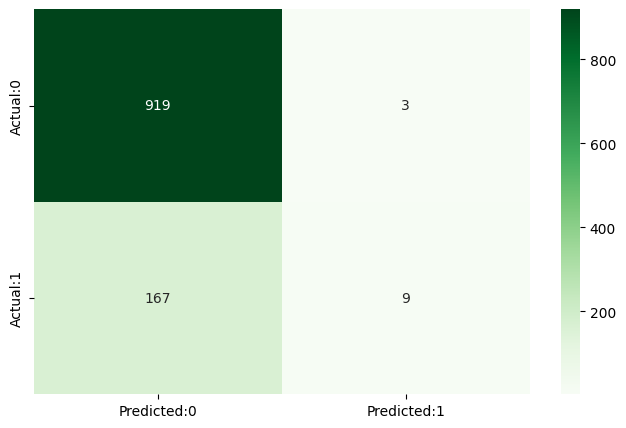

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       922
           1       0.75      0.05      0.10       176

    accuracy                           0.85      1098
   macro avg       0.80      0.52      0.51      1098
weighted avg       0.83      0.85      0.78      1098



In [73]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred)) #El informe de clasificación

# This code is modified by Susobhan Akhuli


* Clase 0: Son los casos donde no hay riesgo de enfermedad cardíaca (negativos).
* Clase 1: Son los casos donde sí hay riesgo de enfermedad cardíaca (positivos).

# Conclusiones

Para la clase 0 (sin enfermedad, 922 casos):
* Precision: 0.85
Esto significa que el 85% de las veces que el modelo predice que no hay enfermedad, acierta (es decir, no hay muchos falsos positivos).

* Recall: 1.00
El recall perfecto indica que el modelo está identificando correctamente todos los casos negativos (sin riesgo de enfermedad cardíaca). No se están escapando casos negativos.

* F1-score: 0.92
Este valor combina la precision y el recall para dar una medida equilibrada del rendimiento. En este caso, el valor es alto porque tanto la precision como el recall para la clase 0 son bastante buenos.

Para la clase 1 (con riesgo de enfermedad, 176 casos):
* Precision: 0.75
De todas las veces que el modelo predijo que alguien tenía riesgo de enfermedad cardíaca, acertó el 75% de las veces (pero también cometió falsos positivos).

* Recall: 0.05
Este valor es bastante bajo, lo que significa que el modelo solo está identificando correctamente el 5% de las personas con riesgo de enfermedad. Es decir, está fallando en capturar la mayoría de los casos positivos.

* F1-score: 0.10
El F1-score es bajo porque, aunque la precision es razonablemente alta, el recall es muy bajo, lo que afecta al valor combinado.

**Métricas generales**:

* Accuracy: 0.85
El accuracy del modelo es del 85%, lo que significa que en general está prediciendo correctamente el 85% de los casos. Sin embargo, debido al desbalance de clases, esta métrica es engañosa (ya que el modelo es muy bueno prediciendo negativos pero muy malo prediciendo positivos).

* Macro avg (promedio macro):
Calcula el promedio simple de precision, recall y F1-score entre las clases.
Precision: 0.80, Recall: 0.52, F1-score: 0.51. Estas son las medias sin ponderar de las métricas de las clases 0 y 1.

* Weighted avg (promedio ponderado):
Calcula las métricas promedio ponderadas por el número de casos en cada clase.
Precision: 0.83, Recall: 0.85, F1-score: 0.78. Esto tiene en cuenta el desequilibrio en los tamaños de clase, dando más peso a la clase 0 (que es mucho más grande).

# Métricas

**Precision and Recall** <p>

* Precision: Mide la proporción de verdaderos positivos entre todas las predicciones positivas. Es útil cuando te interesa saber cuántos de los casos que predijiste como positivos realmente lo son.

Precision= (tp + fp) / tp

* Recall: También conocida como sensibilidad o tasa de verdaderos positivos, es una métrica que mide la capacidad del modelo para identificar correctamente todos los casos positivos.

Recall= tp / (tp + fn)

In [74]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.75
Recall: 0.05113636363636364


**Specificity (Especificidad)** <p>

Definición: También conocida como la tasa de verdaderos negativos. Mide la proporción de verdaderos negativos entre todos los casos negativos. Es útil si te interesa saber qué tan bien predice tu modelo los negativos.

Specificity= tn / (tn + fp)

In [75]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraer los valores TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular specificity
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')


Specificity: 0.9967462039045553


# Interpretación

* Precision: Si obtienes un valor alto, tu modelo es bueno prediciendo positivos sin tener muchos falsos positivos.
* Recall (Sensibilidad): Si es alto, tu modelo está capturando la mayoría de los verdaderos positivos.
* Specificity: Indica qué tan bien el modelo evita falsos positivos y predice correctamente los negativos.



---


# Prueba 2

Definir variables

In [76]:
#Definir las variables independiente y dependiente
#Dentro de la variable independiente definimos los atributos que queremos usar, por ejemplo:'age', 'Sex_male', 'cigsPerDay', totChol', 'sysBP', 'glucose'

X = np.asarray(disease_df[['Sex_male', 'cigsPerDay', 'heartRate',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2560, 6) (2560,)
Test set: (1098, 6) (1098,)


Entrenar al modelo

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Evaluar

In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8424408014571949


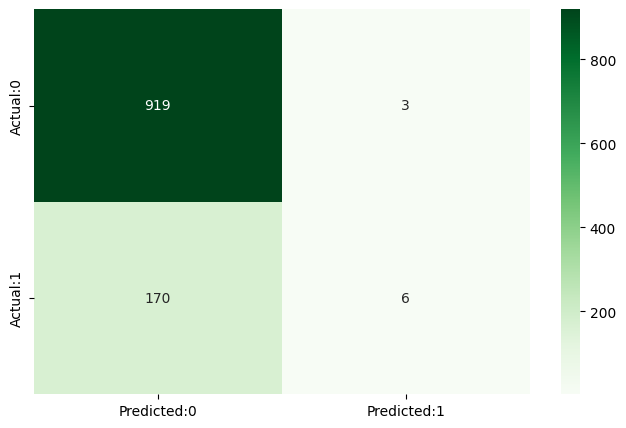

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       922
           1       0.67      0.03      0.06       176

    accuracy                           0.84      1098
   macro avg       0.76      0.52      0.49      1098
weighted avg       0.82      0.84      0.78      1098



In [79]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is modified by Susobhan Akhuli

# Métricas

In [80]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.6666666666666666
Recall: 0.03409090909090909


In [81]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraer los valores TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular specificity
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')


Specificity: 0.9967462039045553




---


# Prueba 3

Definir las variebles

In [82]:
#Definir las variables independiente y dependiente
#Dentro de la variable independiente definimos los atributos que queremos usar, por ejemplo:'age', 'Sex_male', 'cigsPerDay', totChol', 'sysBP', 'glucose'

X = np.asarray(disease_df[['BPMeds', 'cigsPerDay', 'heartRate',
                           'education', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2560, 6) (2560,)
Test set: (1098, 6) (1098,)


Entrenar al modelo

In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

Evaluar


In [84]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))


Accuracy of the model is = 0.8378870673952641


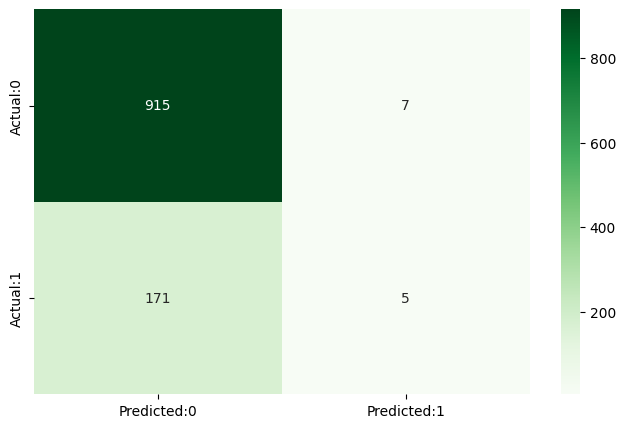

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       922
           1       0.42      0.03      0.05       176

    accuracy                           0.84      1098
   macro avg       0.63      0.51      0.48      1098
weighted avg       0.77      0.84      0.77      1098



In [85]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is modified by Susobhan Akhuli

# Métricas

In [86]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Precision: 0.4166666666666667
Recall: 0.028409090909090908


In [87]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraer los valores TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Calcular specificity
specificity = TN / (TN + FP)
print(f'Specificity: {specificity}')

Specificity: 0.9924078091106291


In [88]:
from sklearn.metrics import f1_score

# Calcular F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')


F1-score: 0.05319148936170213




---


# Análisis

análisis de lo que se obtuvo en las tres pruebas:

1. Accuracy:
En las tres pruebas, el accuracy está alrededor del 84%. Esto significa que el modelo está prediciendo correctamente aproximadamente el 84% de los casos (tanto positivos como negativos). Sin embargo, esta métrica puede ser engañosa cuando las clases están desbalanceadas, es decir, cuando tienes muchos más casos negativos que positivos (lo cual es común en problemas como la predicción de enfermedades).
2. Precision:
En todas las pruebas, la precisión es del 41.67%. Esto significa que de todas las veces que el modelo predijo que alguien tendría una enfermedad cardíaca, solo el 41.67% fue correcto. Esto sugiere que el modelo está generando bastantes falsos positivos (predice riesgo de enfermedad cuando en realidad no lo hay).
3. Recall:
El recall (sensibilidad) es extremadamente bajo, con un valor de 0.028, o alrededor del 2.8%. Esto indica que el modelo está fallando en identificar la mayoría de los casos positivos, es decir, las personas que realmente tienen riesgo de enfermedad cardíaca. En otras palabras, está perdiendo la mayoría de los casos que debería identificar, lo que puede ser muy problemático en un contexto médico, donde no quieres perder casos de riesgo.
4. Specificity:
La especificidad es muy alta, cerca del 99.24% en las tres pruebas. Esto indica que el modelo es excelente identificando los negativos verdaderos, es decir, personas que no tienen riesgo de enfermedad cardíaca. En otras palabras, casi nunca predice un riesgo de enfermedad para alguien que realmente no lo tiene.




---

1. Manejo de clases desbalanceadas:

Podrías usar técnicas como resampling (sobremuestreo de la clase minoritaria o submuestreo de la clase mayoritaria) o aplicar penalización para los errores en la clase minoritaria con el parámetro `class_weight='balanced'` en LogisticRegression.



In [89]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

2. Ajustar el umbral de clasificación:

El umbral predeterminado para clasificar una predicción como "positiva" es 0.5, pero puedes ajustarlo para mejorar el recall. Puedes predecir probabilidades en lugar de etiquetas y ajustar el umbral manualmente.

In [90]:
 y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_adjusted = [1 if prob > 0.3 else 0 for prob in y_pred_prob]


In [91]:
X = np.asarray(disease_df[['age', 'Sex_male', 'heartRate',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2560, 6) (2560,)
Test set: (1098, 6) (1098,)


In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

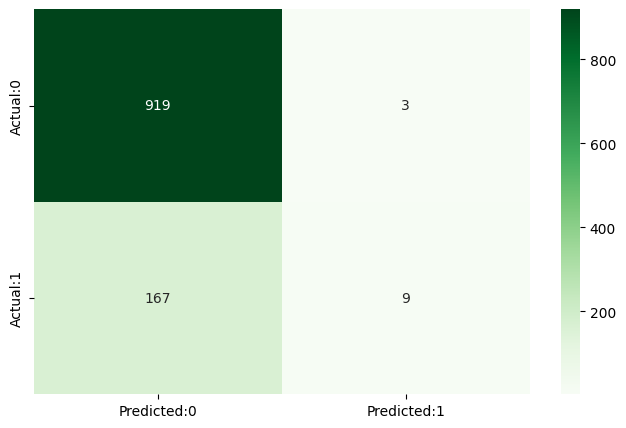

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       922
           1       0.75      0.05      0.10       176

    accuracy                           0.85      1098
   macro avg       0.80      0.52      0.51      1098
weighted avg       0.83      0.85      0.78      1098



In [93]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))
